<a href="https://colab.research.google.com/github/Yash2004Codes/PDS_PROJECT/blob/main/PDS_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#loading dataset
import pandas as pd
data = pd.read_csv("StudentPerformanceFactors.csv")
data.head()

df = pd.DataFrame(data)
print(df)

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                     

In [ ]:

# Count the number of missing (NaN) values in each column
null_counts = df.isnull().sum()
print(null_counts)

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [ ]:
#handling null values


#mode for categorical features
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

#after handling
null_counts = df.isnull().sum()
print(null_counts)

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [ ]:
#encodings
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Teacher_Quality'] = label_encoder.fit_transform(df['Teacher_Quality'])
df['Parental_Involvement'] = label_encoder.fit_transform(df['Parental_Involvement'])
df['Parental_Education_Level'] = label_encoder.fit_transform(df['Parental_Education_Level'])
df['Distance_from_Home'] = label_encoder.fit_transform(df['Distance_from_Home'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Access_to_Resources'] = label_encoder.fit_transform(df['Access_to_Resources'])
df['Extracurricular_Activities'] = label_encoder.fit_transform(df['Extracurricular_Activities'])
df['Motivation_Level'] = label_encoder.fit_transform(df['Motivation_Level'])
df['Internet_Access'] = label_encoder.fit_transform(df['Internet_Access'])
df['Family_Income'] = label_encoder.fit_transform(df['Family_Income'])
df['School_Type'] = label_encoder.fit_transform(df['School_Type'])
df['Peer_Influence'] = label_encoder.fit_transform(df['Peer_Influence'])
df['Learning_Disabilities'] = label_encoder.fit_transform(df['Learning_Disabilities'])


print(df)

      Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0                23          84                     1                    0   
1                19          64                     1                    2   
2                24          98                     2                    2   
3                29          89                     1                    2   
4                19          92                     2                    2   
...             ...         ...                   ...                  ...   
6602             25          69                     0                    2   
6603             23          76                     0                    2   
6604             20          90                     2                    1   
6605             10          86                     0                    0   
6606             15          67                     2                    1   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores 

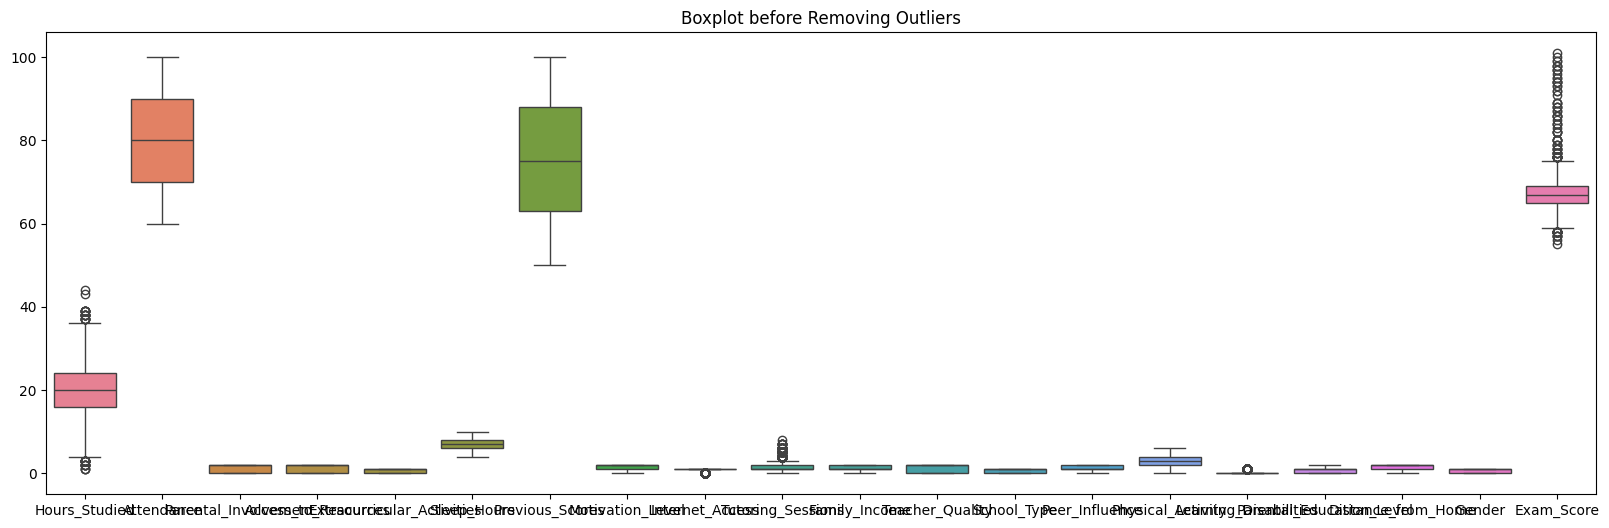

In [ ]:
#detecting outliers

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the initial boxplot to check for outliers
plt.figure(figsize=(20, 6))
sns.boxplot(data=df)
plt.title("Boxplot before Removing Outliers")
plt.show()

# Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
Q1 = df[['Hours_Studied','Tutoring_Sessions']].quantile(0.25)
Q3 = df[['Hours_Studied','Tutoring_Sessions']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


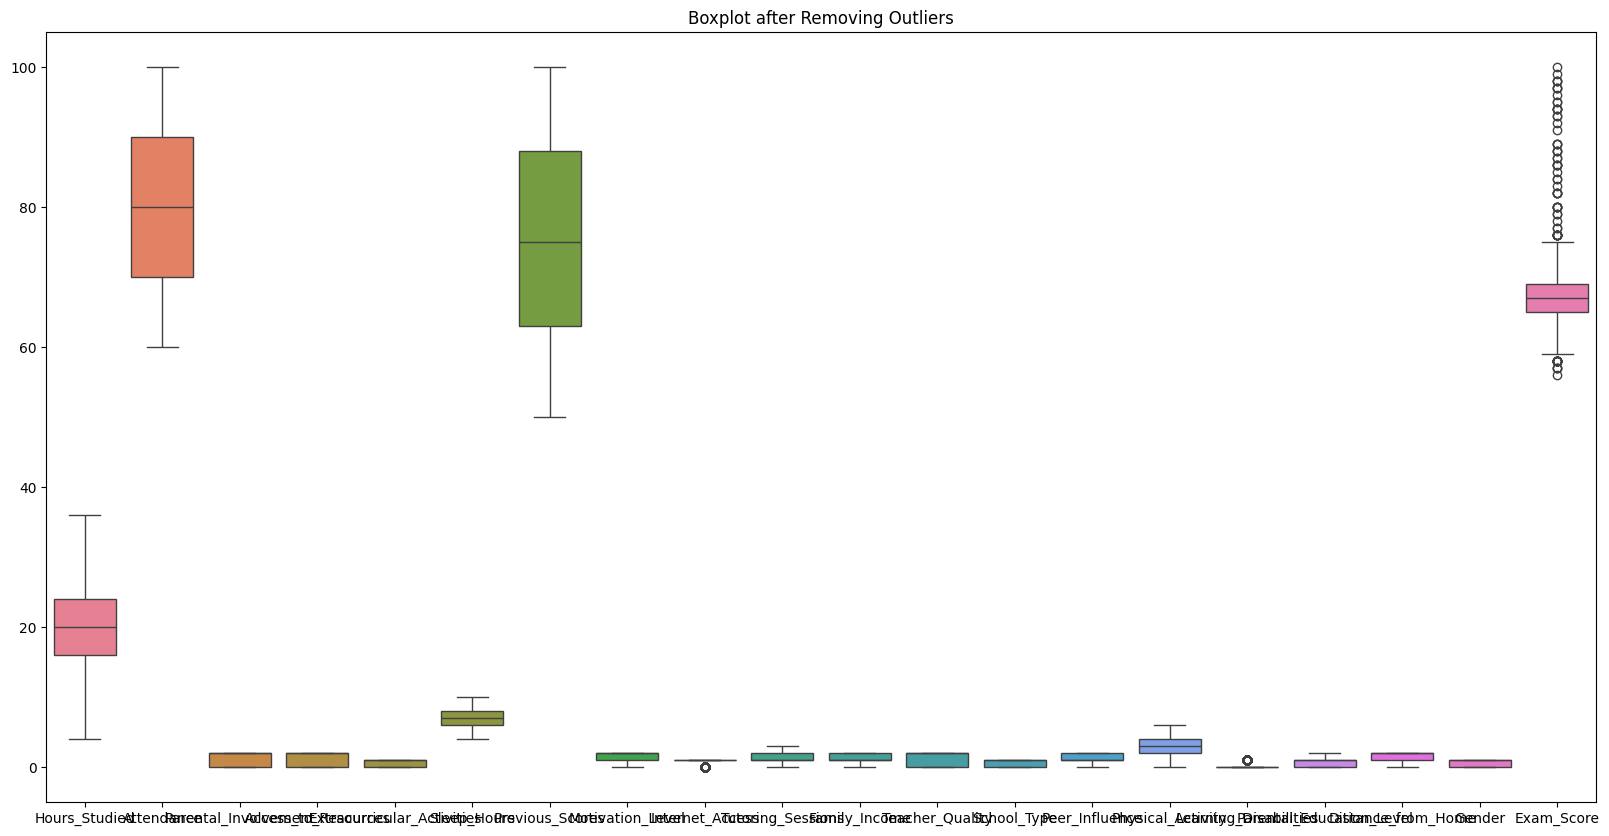

In [ ]:
#handling outliers

import seaborn as sns
import matplotlib.pyplot as plt
# method 1 -removing outliers
df = df[~((df[['Hours_Studied','Tutoring_Sessions']] < lower_bound) | (df[['Hours_Studied','Tutoring_Sessions']] > upper_bound)).any(axis=1)]


plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.title("Boxplot after Removing Outliers")
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is already defined (your dataframe with features and target)

# Define the feature columns (X) and the target column (y)
X = df.drop(columns=['Exam_Score'])  # Drop the target column from features
y = df['Exam_Score']  # This is the target column you're trying to predict

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler to transform the test set

# Build a neural network model using TensorFlow/Keras
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),  # Input layer + first hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1)  # Output layer (1 unit for regression output)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using MSE, MAE, and R^2
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R^2): {r2:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4055.0625 - val_loss: 1602.1526
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 836.9432 - val_loss: 43.8934
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.2135 - val_loss: 37.3344
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.5273 - val_loss: 32.6697
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.5383 - val_loss: 28.8704
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.4285 - val_loss: 25.4163
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.2597 - val_loss: 22.6094
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.3362 - val_loss: 20.3793
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.7004 - val_loss: 18.4237
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.7648 - val_loss: 16.7677
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.8474 - val_loss: 15.4442
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is already defined (your dataframe with features and target)

# Define the feature columns (X) and the target column (y)
X = df.drop(columns=['Exam_Score'])  # Drop the target column from features
y = df['Exam_Score']  # This is the target column you're trying to predict

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler to transform the test set

# Initialize the Support Vector Machine (SVM) model
svm = SVC(kernel='linear', random_state=42)  # You can change the kernel as needed ('linear', 'rbf', etc.)

# Train the model on the scaled training data
svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm.predict(X_test_scaled)

# Evaluate the model using MSE, MAE, and R^2
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R^2): {r2:.4f}")


Mean Squared Error (MSE): 5.8941
Mean Absolute Error (MAE): 1.1214
R-squared (R^2): 0.5674


In [ ]:
# training Lasso Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Define the feature columns (X) and the target column (y)
X = df.drop(columns=['Exam_Score'])  # Drop the target column from features
y = df['Exam_Score']  # This is the target column you're trying to predict

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler to transform the test set


#from sklearn.linear_model import Lasso
#lasso = Lasso(alpha=0.001)

# Train the model on the scaled training data
#lasso.fit(X_train_scaled, y_train)

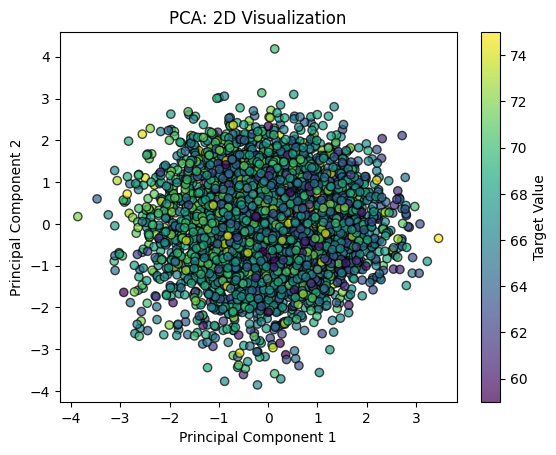

In [ ]:
#applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Scatter plot: Plot the first principal component vs. the second
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', alpha=0.7)

# Label the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a title
plt.title('PCA: 2D Visualization')

# Add color bar (to show the mapping of the color to the labels or target)
plt.colorbar(label='Target Value')  # Add label to the color bar for clarity

# Show the plot
plt.show()

In [ ]:
#evaluting perfomance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Make predictions on the test set
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#calculating mae
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")



Mean Squared Error: 1.2734941577660868
R-squared: 0.8730279192376044
Mean Absolute Error: 0.9069151108103648


In [ ]:
#training  metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Make predictions on the test set
y_pred = lasso.predict(X_train_scaled)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
#calculating mae
mae = mean_absolute_error(y_train, y_pred)

print(f"Traaining data metrics :")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")


Traaining data metrics :
Mean Squared Error: 1.197924576680891
R-squared: 0.8858469304724295
Mean Absolute Error: 0.8875229843514969


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on the test set
y_pred_test = lasso.predict(X_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics for the test set
print(f"Test data metrics:")
print(f"Mean Squared Error: {mse_test:.4f}")
print(f"R-squared: {r2_test:.4f}")
print(f"Mean Absolute Error: {mae_test:.4f}")


Test data metrics:
Mean Squared Error: 1.2735
R-squared: 0.8730
Mean Absolute Error: 0.9069


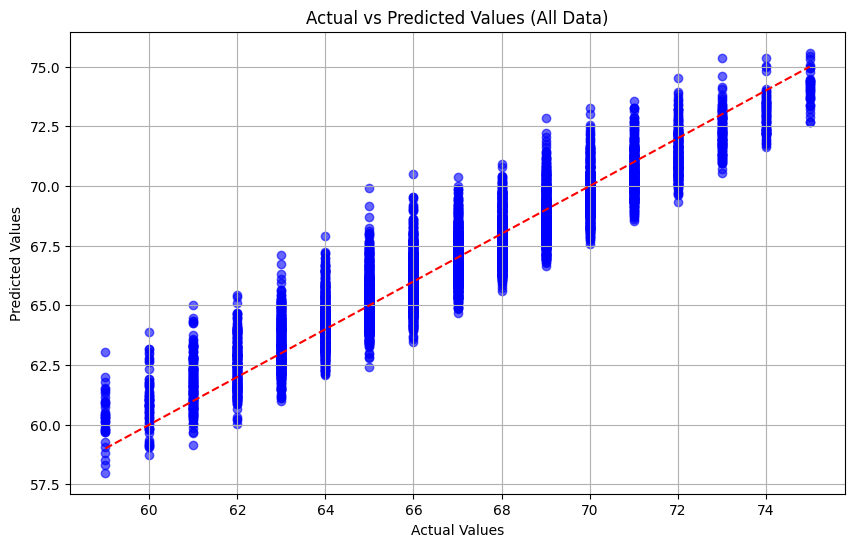

In [ ]:
#ploting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on both training and testing sets
y_pred_train = lasso.predict(X_train_scaled)
y_pred_test = lasso.predict(X_test_scaled)

# Combine actual values (y) and predicted values (y_pred) for both train and test sets
y_actual_all = pd.concat([y_train, y_test], axis=0)  # Actual values (train + test)
y_pred_all = np.concatenate([y_pred_train, y_pred_test], axis=0)  # Predicted values (train + test)

# Plotting the actual vs predicted values for all data (train + test)
plt.figure(figsize=(10, 6))
plt.scatter(y_actual_all, y_pred_all, color='blue', alpha=0.6)
plt.plot([min(y_actual_all), max(y_actual_all)], [min(y_actual_all), max(y_actual_all)], color='red', linestyle='--')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Lasso Regression)')
plt.grid(True)
plt.show()
